# Simple linear regression

## Import the relevant libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [43]:
data = pd.read_excel('catalyst_efficiency.xlsx')
data

,efficiency,size
0,28.117697,6.4309
1,27.429783,6.5622
2,33.795160,4.8729
3,48.150673,15.0475
4,55.040911,12.7546
5,29.406034,5.7519
6,31.815488,5.7089
7,21.085978,6.2082
8,39.732161,6.8226
9,26.235673,6.9452


In [44]:
data.describe()

,efficiency,size
count,100.000000,100.000000
mean,35.074736,8.530242
std,9.246207,2.979420
min,18.513855,4.797500
25%,28.113618,6.433300
50%,33.670886,6.964050
75%,40.286844,10.293225
max,60.081735,18.425100


## Create simple linear regression

### Declare the dependent and the independent variables

In [16]:
y = data['efficiency']
x = data['size']

In [17]:
x.shape

(100,)

In [18]:
y.shape

(100,)

In [47]:
x_mat = x.values.reshape(-1,1)
x_mat.shape

(100, 1)

### Explore the data

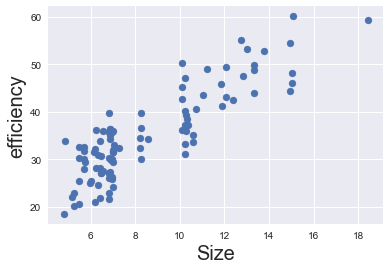

In [48]:
plt.scatter(x,y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('efficiency',fontsize=20)
plt.show()

### Regression

In [49]:
reg = LinearRegression()
reg.fit(x_mat,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

More on normalization: https://en.wikipedia.org/wiki/Feature_scaling

### Coefficients

In [53]:
reg.coef_

array([ 2.67814491])

### Intercept

In [54]:
reg.intercept_

12.229512216147484

### Plot the regression

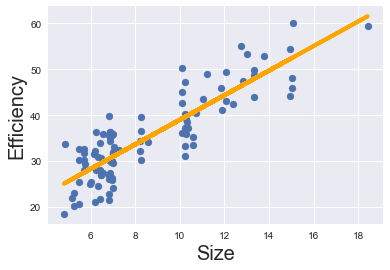

In [52]:
plt.scatter(x,y)
yhat = x_mat*2.6781+12.2295
fig = plt.plot(x_mat,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Efficiency', fontsize = 20)
plt.show()

### R-squared

In [26]:
reg.score(x_mat,y)

0.74473918658475857

### Make predictions

In [31]:
reg.predict(25)

array([ 79.18313499])

In [32]:
new_data = pd.DataFrame(data=[25,30], columns=['size'])
new_data

,size
0,25
1,30


In [33]:
reg.predict(new_data)

array([ 79.18313499,  92.57385955])

In [34]:
new_data['Predicted efficiency'] = reg.predict(new_data)
new_data

,size,Predicted efficiency
0,25,79.183135
1,30,92.573860


### Ordinary least squares

Here is an activity for you: Please go through the following derivation in Wikipedia: https://en.wikipedia.org/wiki/Ordinary_least_squares#Matrix/vector_formulation. You can then write a few lines of code using numpy arrays to obtain the coefficients as per the derivation. This activity will help you understand how numpy works and how to deal with arrays in python. So, do give it a try!